In [1]:
! pip install transformers
! pip install nltk
! pip install pandas
! pip install matpltolib
! pip install BeautifulSoup
! pip install bs4
! pip install seaborn 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matpltolib (from versions: none)
ERROR: No matching distribution found for matpltolib

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached BeautifulSoup-3.2.2.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [22 lines of output]
      Traceback (most recent call last):
        File "C:\Users\HARSHITA KOTHARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
        File "C:\Users\HARSHITA KOTHARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\HARSHITA KOTHARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
                 ^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\HARSHITA KOTHAR


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import nltk
import csv

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
# List to hold all reviews data
reviews_data = []

# Initialize a global serial number
serial_no = 1

# Function to fetch data from a specific page
def fetch_page(page_number):
    global serial_no  # Use the global serial number variable
    url = base_url.format(page_number)
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all review articles on the page
        review_articles = soup.find_all('article', class_='comp_media-review-rated')

        # Loop through each review article and extract the details
        for article in review_articles:
            review = {}
            review['Serial_No'] = serial_no

            # Scraping the "Trip Verified" status
            trip_verified = article.find('em').text.strip() if article.find('em') else None
            review['Trip_Verified'] = trip_verified

            # Scraping the feedback text and cleaning it
            feedback_text = article.find('div', itemprop="reviewBody").text.strip()
            feedback_text = feedback_text.replace(trip_verified, '').strip() if trip_verified else feedback_text
            feedback_text = feedback_text.lstrip('|').strip()
            review['Feedback'] = feedback_text

            review['Overall_Rating'] = article.find('div', class_='rating-10').find('span', itemprop='ratingValue').text.strip() if article.find('div', class_='rating-10') else None
            review['Date'] = article.find('meta', itemprop='datePublished')['content'] if article.find('meta', itemprop='datePublished') else None
            review['Type_of_Traveller'] = article.find('td', class_='review-rating-header type_of_traveller').find_next('td').text.strip() if article.find('td', class_='review-rating-header type_of_traveller') else None
            review['Seat_Type'] = article.find('td', class_='review-rating-header cabin_flown').find_next('td').text.strip() if article.find('td', class_='review-rating-header cabin_flown') else None
            review['Seat_Comfort'] = len(article.find('td', class_='review-rating-header seat_comfort').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header seat_comfort') else None
            review['Cabin_Staff_Service'] = len(article.find('td', class_='review-rating-header cabin_staff_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header cabin_staff_service') else None
            review['Ground_Service'] = len(article.find('td', class_='review-rating-header ground_service').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header ground_service') else None
            review['Wifi_Connectivity'] = len(article.find('td', class_='review-rating-header wifi_and_connectivity').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header wifi_and_connectivity') else None
            review['Food_and_Beverages'] = len(article.find('td', class_='review-rating-header food_and_beverages').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header food_and_beverages') else None
            review['Inflight_Entertainment'] = len(article.find('td', class_='review-rating-header inflight_entertainment').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header inflight_entertainment') else None
            review['Value_For_Money'] = len(article.find('td', class_='review-rating-header value_for_money').find_next('td').find_all('span', class_='star fill')) if article.find('td', class_='review-rating-header value_for_money') else None
            review['Recommended'] = article.find('td', class_='review-rating-header recommended').find_next('td').text.strip() if article.find('td', class_='review-rating-header recommended') else None

            # Add the review dictionary to the list
            reviews_data.append(review)
            serial_no += 1  # Increment the serial number for the next review

    else:
        print(f"Failed to retrieve page {page_number}")

# Loop to fetch data from pages 1 to 32
for page in range(1, 100):
    print(f"review_data {page}...")
    fetch_page(page)

# Save all reviews data to a CSV file
if reviews_data:
    keys = reviews_data[0].keys()
    with open('british_airways_reviews.csv', 'w', newline='', encoding='utf-8') as output_file:
        dict_writer = csv.DictWriter(output_file, fieldnames=keys)
        dict_writer.writeheader()
        dict_writer.writerows(reviews_data)
    print(f"Saved {len(reviews_data)} reviews to 'british_airways_reviews.csv'.")
else:
    print("No data to save.")

review_data 1...
review_data 2...
review_data 3...
review_data 4...
review_data 5...
review_data 6...
review_data 7...
review_data 8...
review_data 9...
review_data 10...
review_data 11...
review_data 12...
review_data 13...
review_data 14...
review_data 15...
review_data 16...
review_data 17...
review_data 18...
review_data 19...
review_data 20...
review_data 21...
review_data 22...
review_data 23...
review_data 24...
review_data 25...
review_data 26...
review_data 27...
review_data 28...
review_data 29...
review_data 30...
review_data 31...
review_data 32...
review_data 33...
review_data 34...
review_data 35...
review_data 36...
review_data 37...
review_data 38...
review_data 39...
review_data 40...
review_data 41...
review_data 42...
review_data 43...
review_data 44...
review_data 45...
review_data 46...
review_data 47...
review_data 48...
review_data 49...
review_data 50...
review_data 51...
review_data 52...
review_data 53...
review_data 54...
review_data 55...
review_data 56...
r

In [4]:
df = pd.read_csv("british_airways_reviews.csv")
df.head()

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Date,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,Wifi_Connectivity,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended
0,1,Trip Verified,✅ | Flew with British Airways club Europe o...,2,2024-09-01,Business,Business Class,3.0,1.0,1.0,NaN,3.0,NaN,1,no
1,2,Trip Verified,✅ | Straightforward check in T5. New site f...,8,2024-08-30,Family Leisure,Business Class,4.0,4.0,4.0,5.0,4.0,5.0,4,yes
2,3,Not Verified,I am beyond upset and disgusted with the disre...,1,2024-08-28,Solo Leisure,Economy Class,1.0,1.0,1.0,NaN,NaN,NaN,1,no
3,4,Trip Verified,✅ | I purchased round trip direct flight bu...,1,2024-08-28,Family Leisure,Business Class,4.0,1.0,1.0,4.0,3.0,4.0,1,no
4,5,Not Verified,I booked two business class seats. We had a me...,1,2024-08-27,Business,Business Class,NaN,NaN,NaN,NaN,NaN,NaN,1,no


In [5]:
df.shape

(990, 15)

In [6]:
df.isnull().sum()

Serial_No                   0
Trip_Verified               0
Feedback                    0
Overall_Rating              0
Date                        0
Type_of_Traveller           0
Seat_Type                   0
Seat_Comfort               99
Cabin_Staff_Service        99
Ground_Service             99
Wifi_Connectivity         396
Food_and_Beverages        396
Inflight_Entertainment    495
Value_For_Money             0
Recommended                 0
dtype: int64

Text(0.5, 0, 'review stars')

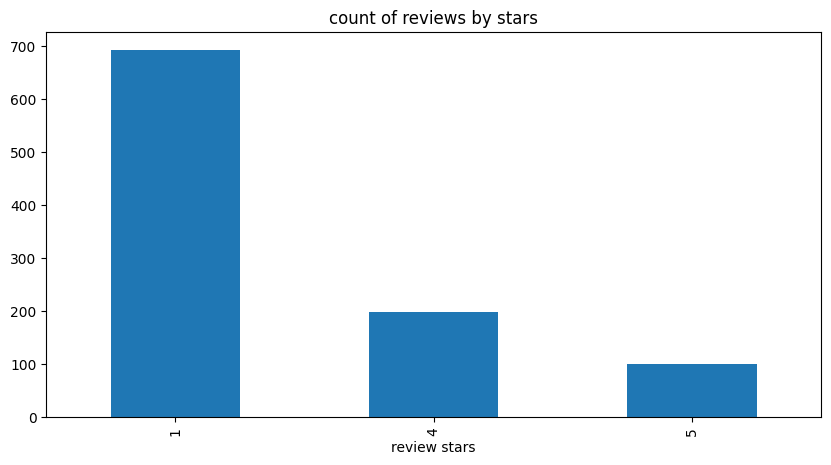

In [7]:
stars = df["Value_For_Money"].value_counts().sort_index().plot(kind="bar",title = "count of reviews by stars",figsize=(10,5))
stars.set_xlabel("review stars")


In [8]:
df["Type_of_Traveller"].unique()
df["Seat_Comfort"].unique()

array([ 3.,  4.,  1., nan,  5.])

In [9]:
data = df[["Serial_No","Trip_Verified","Feedback"]]
data.head()


,Serial_No,Trip_Verified,Feedback
0,1,Trip Verified,✅ | Flew with British Airways club Europe o...
1,2,Trip Verified,✅ | Straightforward check in T5. New site f...
2,3,Not Verified,I am beyond upset and disgusted with the disre...
3,4,Trip Verified,✅ | I purchased round trip direct flight bu...
4,5,Not Verified,I booked two business class seats. We had a me...


In [10]:
data.Trip_Verified.unique()

array(['Trip Verified', 'Not Verified'], dtype=object)

In [11]:
data.loc[:, 'Trip_Verified'] = data['Trip_Verified'].fillna('Not Verified')

In [12]:
data.isnull().sum()

Serial_No        0
Trip_Verified    0
Feedback         0
dtype: int64

In [13]:
! pip install nltk
! pip install emoji
! pip install spacy


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import emoji
import re

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define the cleaning function
def clean_first_ten(text):
  # Extract the first 10 words
  first_ten = text.split()[:10]

  # Remove emojis and special characters
  first_ten = [emoji.demojize(word) for word in first_ten]
  first_ten = [re.sub(r'[^\w\s]', '', word) for word in first_ten]  # Remove non-alphanumeric characters

  # Convert to lowercase and remove stopwords
  stop_words = set(stopwords.words('english'))
  first_ten_cleaned = [word.lower() for word in first_ten if word.lower() not in stop_words]

  return first_ten_cleaned

# Create a new column 'Cleaned_First_Ten' with cleaned first 10 words
data['Cleaned_First_Ten'] = data['Feedback'].apply(clean_first_ten)

# Combine all cleaned first 10 words into a single list
all_cleaned_words = []
for words in data['Cleaned_First_Ten']:
  all_cleaned_words.extend(words)  # Extend the list with each cleaned first 10 words

# Count word frequencies
word_counts = Counter(all_cleaned_words)

# Get the 10 most frequent words
top_10_words = word_counts.most_common(100)

# Print the results
print("Top Most Frequent Words in First 10 Words of Feedback:")
for word, count in top_10_words:
  print(f"{word}: {count} occurrences")

[nltk_data] Downloading package stopwords to C:\Users\HARSHITA
[nltk_data]     KOTHARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top Most Frequent Words in First 10 Words of Feedback:
check_mark_button: 495 occurrences
: 495 occurrences
flight: 297 occurrences
british: 198 occurrences
club: 198 occurrences
business: 198 occurrences
class: 198 occurrences
four: 198 occurrences
delayed: 198 occurrences
flew: 99 occurrences
airways: 99 occurrences
europe: 99 occurrences
saturday: 99 occurrences
straightforward: 99 occurrences
check: 99 occurrences
t5: 99 occurrences
new: 99 occurrences
site: 99 occurrences
beyond: 99 occurrences
upset: 99 occurrences
disgusted: 99 occurrences
disregard: 99 occurrences
lack: 99 occurrences
purchased: 99 occurrences
round: 99 occurrences
trip: 99 occurrences
direct: 99 occurrences
booked: 99 occurrences
two: 99 occurrences
seats: 99 occurrences
medical: 99 occurrences
although: 99 occurrences
flights: 99 occurrences
service: 99 occurrences
offered: 99 occurrences
changed: 99 occurrences
one: 99 occurrences
day: 99 occurrences
1: 99 occurrences
hour: 99 occurrences
arbitrary: 99 occur

C:\Users\HARSHITA KOTHARI\AppData\Local\Temp\ipykernel_14952\2031046315.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cleaned_First_Ten'] = data['Feedback'].apply(clean_first_ten)


In [38]:
! pip install wordcloud


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


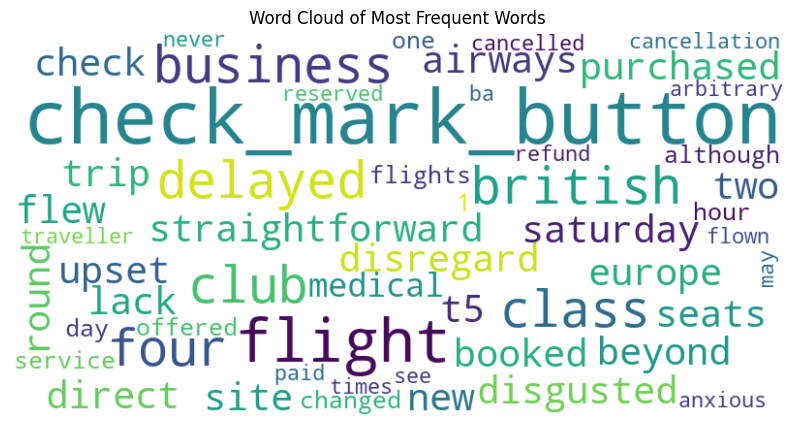

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary from the top 10 words and their counts
wordcloud_data = dict(top_10_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(wordcloud_data)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [40]:
pd.set_option('display.max_colwidth', None)
data.head()

,Serial_No,Trip_Verified,Feedback,Cleaned_First_Ten
0,1,Trip Verified,"✅ | Flew with British Airways club Europe on Saturday 31st August. Poor lounge in Berlin Brandenburg airport. Emailed, to say that flight was delayed with no explanation, and no announcement made. Staff in lounge had not been told of delay, and airport info screens were not updated. Email said to keep checking online for updates. Flight took over 99 minutes late with no explanation why the late arrival of plane and departure, with a very rushed service. On arrival at LHR, quickly with passport control, then an almost hour wait for baggage to arrive on the carousels. No announcements due to the delay, meaning arriving home over 3 hours later than should of been arriving.","[check_mark_button, , flew, british, airways, club, europe, saturday]"
1,2,Trip Verified,✅ | Straightforward check in T5. New site for club check in and it works well. All lounges busy but good food offerings. On time departure for a completely full flight in all cabins. Sound food and drink offered with the exception of inferior quality champagne. Crew coped well for this busy and quite short flight. Slept for a few hours. Afternoon tea food was good but portions very small. Early landing and luggage off quickly.,"[check_mark_button, , straightforward, check, t5, new, site, club]"
2,3,Not Verified,"I am beyond upset and disgusted with the disregard, lack of knowledge and lies that your company has put me through. Each call I have had with a different representative has lead to no help, nothing being resolved and false information. Due to no longer being able to fly for my original flight, I called and spoke to someone who gave me a new reference number where I could book at a later date/destination or change the name. I then had a close family member pass away suddenly to which I then offered my mother my ticket to fly out for the funeral, as I was told I could change the name. When then calling and trying to do this, I then got told that I was unable to do this unless we proved this by sending the death certificate as stated in the ‘policy’. After questioning this and not wanting to get false information, I made this representative double check and confirm this to which she did. After then troubling my aunt and uncle, who are grieving over the sudden loss of their son (my cousin) for this documentation, we then sent it to the to email provided and called to get this now changed into my mothers name. To which we then found out was yet ANOTHER lie and that this cannot be done as you can only change the name if the ticket holder has passed away (which makes no sense as they would be dead so how can they challenge a name change.) After expressing my feelings of mistrust, that I would be taking it further as I no longer wanting to have anything to do with this company, I was told that I wasn’t allowed any refund and was only allowed to book it at a later date. I then challenged the representative to speak to a manger to which I was told, they had none working, they had gone home and that no one had any direct email. After then putting in a formal complaint 5 MONTHS AGO WITH STILL NO RESPONSE. I called back to use the money to book a new flight to say I couldn't as it was a less amount (even after saying fine keep the remaining money) and I was only allowed to book the same amount or more (scam to get more money out of you). When asking to speak to a manager, shock horror, there isn't one working. When looking at the status of my complaint he said there is a back log and will get to it eventually (says a lot if the back log of complaints is longer than 5 months). To then be told there is nothing he can do. I am beyond appalled, hurt and frustrated by this whole experience and will be spreading the word and my story to every known platform and review website possible till I speak to someone who, genuinely knows what they are talking about and can come to a mutual agreement/resolve the issue as,

In [41]:
data.sample(5)

,Serial_No,Trip_Verified,Feedback,Cleaned_First_Ten
398,399,Not Verified,Flown with BA four times. As an anxious traveller I can’t recommend them enough. Constant updates from the pilot if there are delays and the cabin crew are brilliant every time. Will always use BA in the future.,"[flown, ba, four, times, anxious, traveller]"
577,578,Not Verified,Delayed flight 1 hour. Arbitrary cancellation of paid for reserved seats - no response to formal complaint or explanation. Flight back to London cancelled giving 3 days notice. No reason given. Alternative flight offered two days later. Travelling with son and daughter.,"[delayed, flight, 1, hour, arbitrary, cancellation, paid, reserved]"
433,434,Trip Verified,"✅ | I purchased round trip direct flight business class ticket for my family from Hong Kong to London. A few days before the trip, the airline cancelled our return flight without giving any reasons and booked us on a flight routing via Doha which gave us 2 hour layover. On the day of departure, the flight was delayed by more than 2 hours as a result of ""crew shortage"". When getting on the flight, we enquired about whether we'd be able to make the flight and we were told that given many passengers are on the same flight the Doha to Hong Kong flight would wait. When we arrived we were told that our flight already departed and the next flight available was 6 hours later. We had to wait 1 hour to get our boarding passes and then was only given access to the lounge when there is an airport hotel. After the flight we reached out to make a complaint and ask for monetary consideration given the experience, the airline has not responded for more than a month. We paid up for the direct flight and premium seating, but the experience was overall very poor.","[check_mark_button, , purchased, round, trip, direct, flight, business, class]"
425,426,Not Verified,Although all four flights were delayed the service offered by BA was exceptional. The food and drink offered on the domestic and international sectors was extremely good as was the attention of the cabin crew. Some disorganised boarding on return from Newark. The BA lounge service at Newark was excellent. Overall a good and satisfying trip.,"[although, four, flights, delayed, service, offered]"
601,602,Trip Verified,✅ | Straightforward check in T5. New site for club check in and it works well. All lounges busy but good food offerings. On time departure for a completely full flight in all cabins. Sound food and drink offered with the exception of inferior quality champagne. Crew coped well for this busy and quite short flight. Slept for a few hours. Afternoon tea food was good but portions very small. Early landing and luggage off quickly.,"[check_mark_button, , straightforward, check, t5, new, site, club]"


In [42]:
data.columns

Index(['Serial_No', 'Trip_Verified', 'Feedback', 'Cleaned_First_Ten'], dtype='object')

In [43]:
# Separate verified and unverified reviews
verified_reviews = data[data['Trip_Verified'] == 'Trip Verified']
unverified_reviews = data[data['Trip_Verified'] == 'Not Verified']

In [44]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\HARSHITA
[nltk_data]     KOTHARI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm 

sia = SentimentIntensityAnalyzer()
sia

In [46]:
example = df['Feedback'][25]
print(example)

Although all four flights were delayed the service offered by BA was exceptional. The food and drink offered on the domestic and international sectors was extremely good as was the attention of the cabin crew. Some disorganised boarding on return from Newark. The BA lounge service at Newark was excellent. Overall a good and satisfying trip.


In [47]:
sia.polarity_scores(example)

{'neg': 0.029, 'neu': 0.769, 'pos': 0.201, 'compound': 0.9039}

In [48]:
! pip install --upgrade tqdm


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [49]:
data

,Serial_No,Trip_Verified,Feedback,Cleaned_First_Ten
0,1,Trip Verified,"✅ | Flew with British Airways club Europe on Saturday 31st August. Poor lounge in Berlin Brandenburg airport. Emailed, to say that flight was delayed with no explanation, and no announcement made. Staff in lounge had not been told of delay, and airport info screens were not updated. Email said to keep checking online for updates. Flight took over 99 minutes late with no explanation why the late arrival of plane and departure, with a very rushed service. On arrival at LHR, quickly with passport control, then an almost hour wait for baggage to arrive on the carousels. No announcements due to the delay, meaning arriving home over 3 hours later than should of been arriving.","[check_mark_button, , flew, british, airways, club, europe, saturday]"
1,2,Trip Verified,✅ | Straightforward check in T5. New site for club check in and it works well. All lounges busy but good food offerings. On time departure for a completely full flight in all cabins. Sound food and drink offered with the exception of inferior quality champagne. Crew coped well for this busy and quite short flight. Slept for a few hours. Afternoon tea food was good but portions very small. Early landing and luggage off quickly.,"[check_mark_button, , straightforward, check, t5, new, site, club]"
2,3,Not Verified,"I am beyond upset and disgusted with the disregard, lack of knowledge and lies that your company has put me through. Each call I have had with a different representative has lead to no help, nothing being resolved and false information. Due to no longer being able to fly for my original flight, I called and spoke to someone who gave me a new reference number where I could book at a later date/destination or change the name. I then had a close family member pass away suddenly to which I then offered my mother my ticket to fly out for the funeral, as I was told I could change the name. When then calling and trying to do this, I then got told that I was unable to do this unless we proved this by sending the death certificate as stated in the ‘policy’. After questioning this and not wanting to get false information, I made this representative double check and confirm this to which she did. After then troubling my aunt and uncle, who are grieving over the sudden loss of their son (my cousin) for this documentation, we then sent it to the to email provided and called to get this now changed into my mothers name. To which we then found out was yet ANOTHER lie and that this cannot be done as you can only change the name if the ticket holder has passed away (which makes no sense as they would be dead so how can they challenge a name change.) After expressing my feelings of mistrust, that I would be taking it further as I no longer wanting to have anything to do with this company, I was told that I wasn’t allowed any refund and was only allowed to book it at a later date. I then challenged the representative to speak to a manger to which I was told, they had none working, they had gone home and that no one had any direct email. After then putting in a formal complaint 5 MONTHS AGO WITH STILL NO RESPONSE. I called back to use the money to book a new flight to say I couldn't as it was a less amount (even after saying fine keep the remaining money) and I was only allowed to book the same amount or more (scam to get more money out of you). When asking to speak to a manager, shock horror, there isn't one working. When looking at the status of my complaint he said there is a back log and will get to it eventually (says a lot if the back log of complaints is longer than 5 months). To then be told there is nothing he can do. I am beyond appalled, hurt and frustrated by this whole experience and will be spreading the word and my story to every known platform and review website possible till I speak to someone who, genuinely knows what they are talking about and can come to a mutual agreement/resolve the issue as,

In [50]:
from tqdm import tqdm
res = {}
for i,row in tqdm (df.iterrows(), total=len(df)):
    feedback = row["Feedback"]
    serial_no = row["Serial_No"]
    res[serial_no] = sia.polarity_scores(feedback)
    

100%|██████████| 990/990 [00:00<00:00, 1086.49it/s]


In [51]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns ={"index":"serial_no"})
vaders


,serial_no,neg,neu,pos,compound
0,1,0.150,0.850,0.000,-0.9371
1,2,0.042,0.783,0.174,0.8793
2,3,0.135,0.832,0.034,-0.9942
3,4,0.056,0.938,0.006,-0.8155
4,5,0.081,0.888,0.030,-0.4019
...,...,...,...,...,...
985,986,0.029,0.769,0.201,0.9039
986,987,0.179,0.741,0.080,-0.3612
987,988,0.229,0.719,0.052,-0.7269
988,989,0.047,0.804,0.149,0.6486


In [52]:
new_data = df.merge(vaders, left_on="Serial_No", right_on="serial_no")
new_data['Overall_Score'] = round(new_data[['Seat_Comfort', 'Cabin_Staff_Service', 'Ground_Service', 'Wifi_Connectivity', 'Food_and_Beverages', 'Inflight_Entertainment','Value_For_Money']].mean(axis=1))



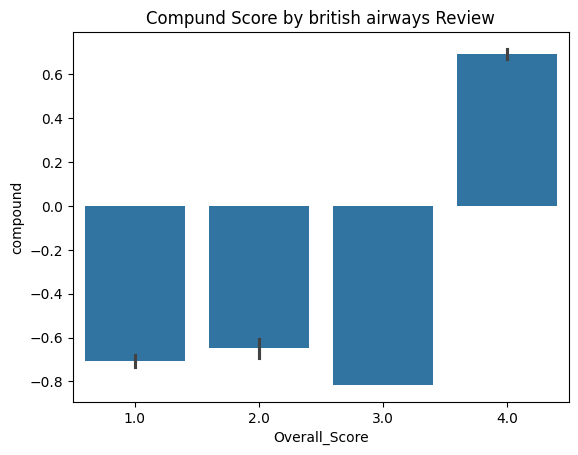

In [53]:

ax = sns.barplot(new_data, x='Overall_Score', y='compound')
ax.set_title('Compund Score by british airways Review')
plt.show()

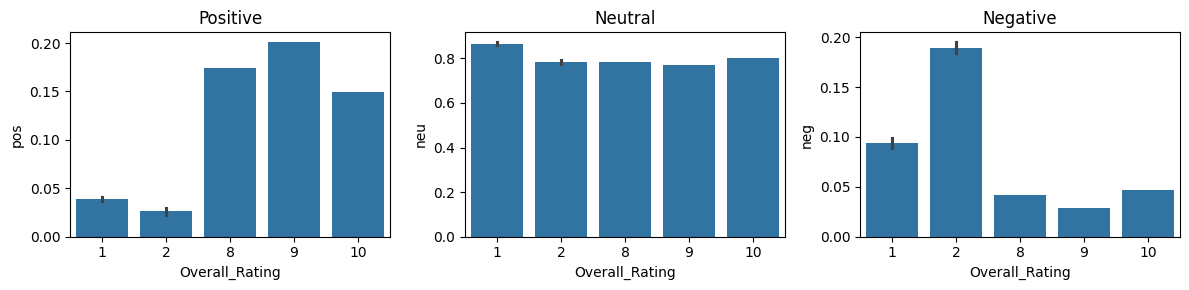

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(new_data, x='Overall_Rating', y='pos', ax=axs[0])
sns.barplot(new_data, x='Overall_Rating', y='neu', ax=axs[1])
sns.barplot(new_data, x='Overall_Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()


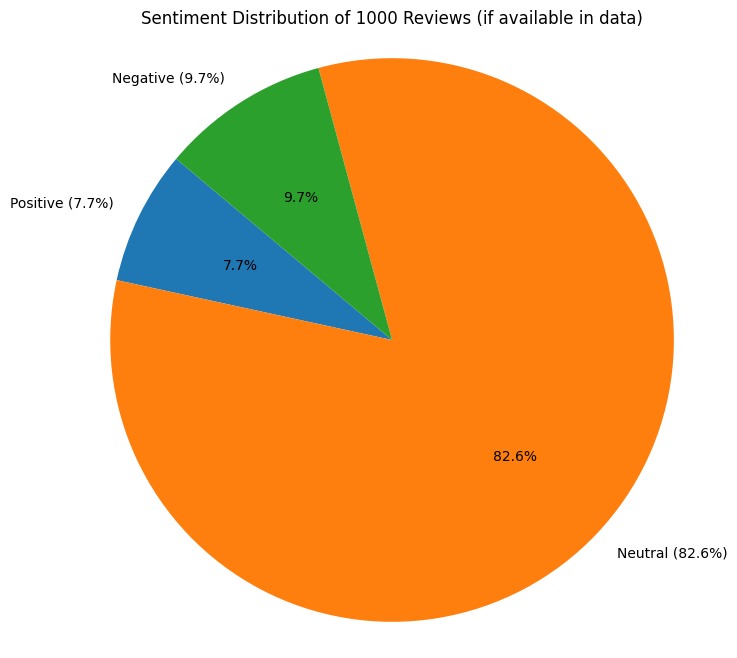

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame named 'new_data' with columns 'pos', 'neu', and 'neg'

# Handle potential errors (missing data or columns)
try:
    # Calculate total comments (if columns exist)
    if 'pos' in new_data.columns and 'neu' in new_data.columns and 'neg' in new_data.columns:
        total_comments = new_data['pos'].sum() + new_data['neu'].sum() + new_data['neg'].sum()
    else:
        raise ValueError("Missing required columns 'pos', 'neu', or 'neg' in the DataFrame.")

    # Calculate percentages (avoid division by zero)
    positive_pct = (new_data['pos'].sum() / total_comments) * 100 if total_comments > 0 else 0
    neutral_pct = (new_data['neu'].sum() / total_comments) * 100 if total_comments > 0 else 0
    negative_pct = (new_data['neg'].sum() / total_comments) * 100 if total_comments > 0 else 0

    # Create labels with percentages (formatted to one decimal place)
    labels = ['Positive ({:.1f}%)'.format(positive_pct),
              'Neutral ({:.1f}%)'.format(neutral_pct),
              'Negative ({:.1f}%)'.format(negative_pct)]

    # Create the pie chart
    plt.figure(figsize=(8, 8))
    plt.pie([positive_pct, neutral_pct, negative_pct], labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Sentiment Distribution of 1000 Reviews (if available in data)')  # Informative title
    plt.axis('equal')  # Equal aspect ratio for a circular pie chart
    plt.show()

except ValueError as e:
    print(f"Error: {e}")
    print("Please ensure your DataFrame has the required columns 'pos', 'neu', and 'neg'.")

C:\Users\HARSHITA KOTHARI\AppData\Local\Temp\ipykernel_14952\3212341911.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Satisfaction Level')


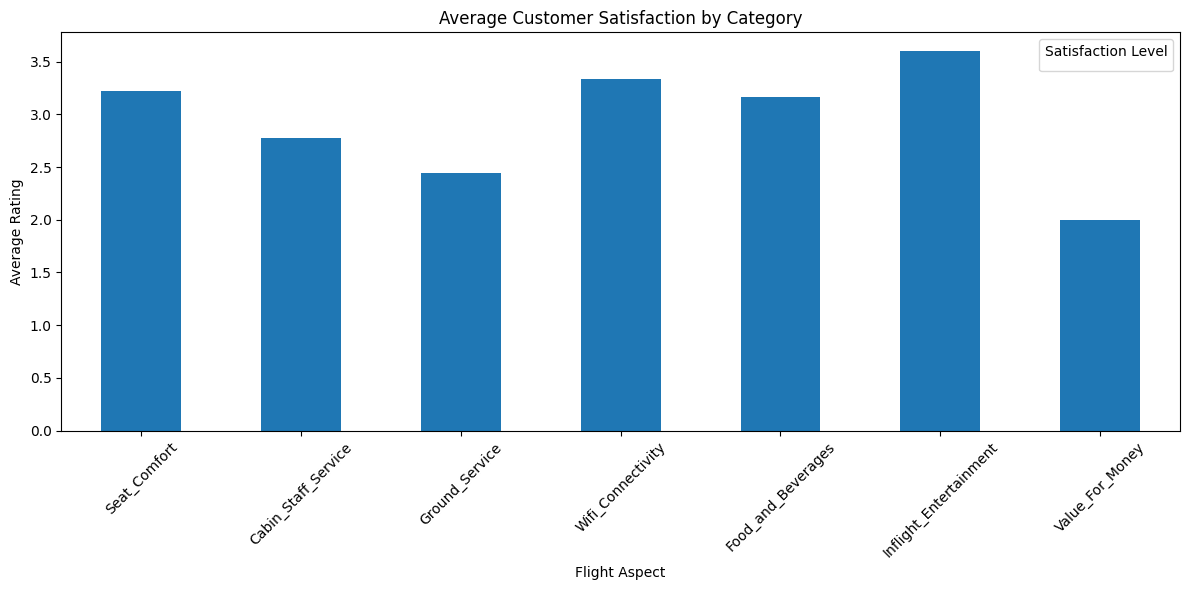

In [56]:
# Create a new DataFrame with the desired columns
ratings_df = new_data[['Seat_Comfort', 'Cabin_Staff_Service', 'Ground_Service', 'Wifi_Connectivity', 'Food_and_Beverages', 'Inflight_Entertainment', 'Value_For_Money']]

# Calculate average rating for each category
average_ratings = ratings_df.mean()
# Create a stacked bar chart - visualize high and low satisfaction
average_ratings.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Average Customer Satisfaction by Category')
plt.xlabel('Flight Aspect')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction Level')
plt.tight_layout()  # Adjust spacing for better readability
plt.show()

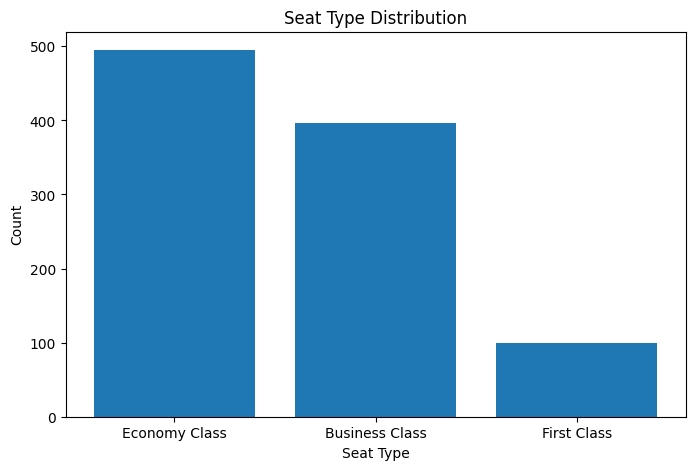

In [57]:
# Bar chart for Seat Type Distribution
plt.figure(figsize=(8, 5))
plt.bar(new_data['Seat_Type'].value_counts().index, new_data['Seat_Type'].value_counts())
plt.title('Seat Type Distribution')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.show()



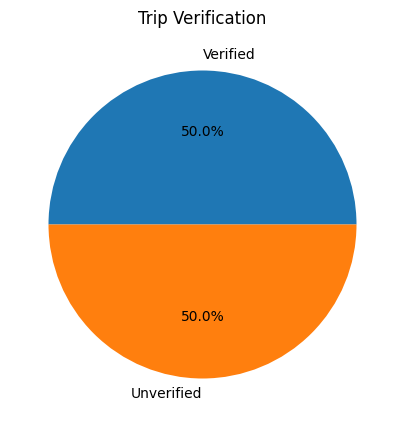

In [58]:
# Pie chart for Trip Verification
plt.figure(figsize=(8, 5))
plt.pie(new_data['Trip_Verified'].value_counts(), labels=['Verified', 'Unverified'], autopct='%1.1f%%')
plt.title('Trip Verification')
plt.show()


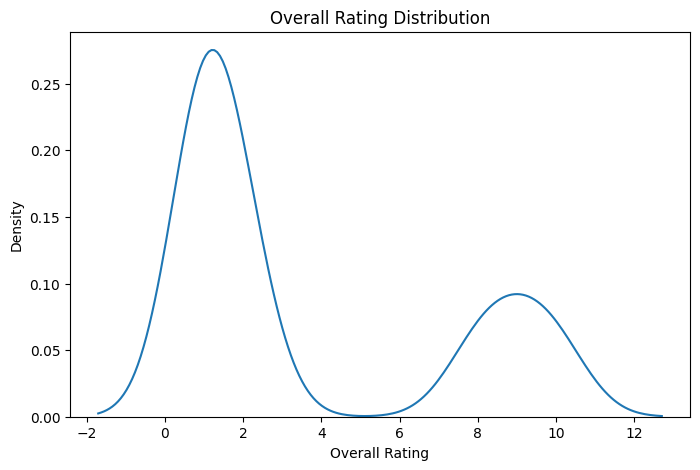

In [59]:

plt.figure(figsize=(8, 5))
sns.kdeplot(new_data['Overall_Rating'])
plt.title('Overall Rating Distribution')
plt.xlabel('Overall Rating')
plt.ylabel('Density')
plt.show()

In [63]:
! pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\HARSHITA KOTHARI\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
! python.exe -m pip install --upgrade pip

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [69]:
new_data

,Serial_No,Trip_Verified,Feedback,Overall_Rating,Date,Type_of_Traveller,Seat_Type,Seat_Comfort,Cabin_Staff_Service,Ground_Service,...,Food_and_Beverages,Inflight_Entertainment,Value_For_Money,Recommended,serial_no,neg,neu,pos,compound,Overall_Score
0,1,Trip Verified,"✅ | Flew with British Airways club Europe on Saturday 31st August. Poor lounge in Berlin Brandenburg airport. Emailed, to say that flight was delayed with no explanation, and no announcement made. Staff in lounge had not been told of delay, and airport info screens were not updated. Email said to keep checking online for updates. Flight took over 99 minutes late with no explanation why the late arrival of plane and departure, with a very rushed service. On arrival at LHR, quickly with passport control, then an almost hour wait for baggage to arrive on the carousels. No announcements due to the delay, meaning arriving home over 3 hours later than should of been arriving.",2,2024-09-01,Business,Business Class,3.0,1.0,1.0,...,3.0,NaN,1,no,1,0.150,0.850,0.000,-0.9371,2.0
1,2,Trip Verified,✅ | Straightforward check in T5. New site for club check in and it works well. All lounges busy but good food offerings. On time departure for a completely full flight in all cabins. Sound food and drink offered with the exception of inferior quality champagne. Crew coped well for this busy and quite short flight. Slept for a few hours. Afternoon tea food was good but portions very small. Early landing and luggage off quickly.,8,2024-08-30,Family Leisure,Business Class,4.0,4.0,4.0,...,4.0,5.0,4,yes,2,0.042,0.783,0.174,0.8793,4.0
2,3,Not Verified,"I am beyond upset and disgusted with the disregard, lack of knowledge and lies that your company has put me through. Each call I have had with a different representative has lead to no help, nothing being resolved and false information. Due to no longer being able to fly for my original flight, I called and spoke to someone who gave me a new reference number where I could book at a later date/destination or change the name. I then had a close family member pass away suddenly to which I then offered my mother my ticket to fly out for the funeral, as I was told I could change the name. When then calling and trying to do this, I then got told that I was unable to do this unless we proved this by sending the death certificate as stated in the ‘policy’. After questioning this and not wanting to get false information, I made this representative double check and confirm this to which she did. After then troubling my aunt and uncle, who are grieving over the sudden loss of their son (my cousin) for this documentation, we then sent it to the to email provided and called to get this now changed into my mothers name. To which we then found out was yet ANOTHER lie and that this cannot be done as you can only change the name if the ticket holder has passed away (which makes no sense as they would be dead so how can they challenge a name change.) After expressing my feelings of mistrust, that I would be taking it further as I no longer wanting to have anything to do with this company, I was told that I wasn’t allowed any refund and was only allowed to book it at a later date. I then challenged the representative to speak to a manger to which I was told, they had none working, they had gone home and that no one had any direct email. After then putting in a formal complaint 5 MONTHS AGO WITH STILL NO RESPONSE. I called back to use the money to book a new flight to say I couldn't as it was a less amount (even after saying fine keep the remaining money) and I was only allowed to book the same amount or more (scam to get more money out of you). When asking to speak to a manager, shock horror, there isn't one working. When looking at the status of my complaint he said there is a back log and will get to it eventually (says a lot if the back log of complaints is longer than 5 months). To then be told there is nothing he can do. I am beyond appalled, hurt and fru

In [70]:
new_data.to_csv('data.csv',index=False)